# Score clustering results

In [1]:
# when you run this code cell, some packages will throw an error bc they are not installed.  Install packages with the above code cell
import numpy as np # numerical Python
import pandas as pd # dataframe manipulation package.  Like Excel on steroids
import matplotlib # plotting library.  Figures, plots, etc.
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm import tqdm, trange # puts a fancy progress bar on any for loop
import os # operating system.  Changes file path, etc.
import sys # system.  Sys.exit() will terminate program at any line.  Useful for debugging
import skimage # scientific python for image reading and processing
from skimage.io import imread # reads an image into Python
import tifffile as tf # alternative package to read image into Pypthon
import scipy # scientific python.  Like numpy but more advanced math
import seaborn as sns # like matplotlib. Alternative plotting library
# import napari # 3D image viewer for microscope images in Python
import dask
import dask.array as da
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import sklearn
import sklearn.metrics

sns.set_style('whitegrid')

# directories and inputs

In [339]:
dataPath = r"..\merfish_results\cluster_comparison"
fn_l = os.listdir(dataPath)
fn_l.sort()

# read clustering results and score

In [325]:
pklFiles

['count_cluster_2_comparison.pkl',
 'network_variability_cluster_comparison.pkl',
 'patch_correlation_cluster_comparison.pkl']

# Merging clusters before evaluation

In [109]:
clusters = df.groupby('Cluster')
l = df['Cluster'].unique()
replacer = {}
for item in l:
    group = clusters.get_group(item)
    temp = group['Cell types'].value_counts()
    replacer[item] = temp.idxmax()
df = df.replace({"Cluster": replacer})

In [267]:
dfScores = {'FowlkesMallows':[], 'Rand':[]}
idx = []
for fn in fn_l:
    if fn.endswith('.pkl'):
        data = pd.read_pickle(os.path.join(dataPath, fn))
        df = pd.DataFrame(data)
        clusters = df.groupby('Cluster')
        l = df['Cluster'].unique()
        replacer = {}
        for item in l:
            group = clusters.get_group(item)
            temp = group['Cell types'].value_counts()
            replacer[item] = temp.idxmax()
        df = df.replace({"Cluster": replacer})
        name = fn.split('_')[0]
        idx.append(name)
        dfScores['FowlkesMallows'].append(sklearn.metrics.fowlkes_mallows_score(labels_true = df['Cell types'], 
                                                      labels_pred = df['Cluster']))
        dfScores['Rand'].append(sklearn.metrics.adjusted_rand_score(labels_true = df['Cell types'], 
                                                      labels_pred = df['Cluster']))

In [268]:
df

,Cell types,Cluster
0,Fibroblast,Fibroblast
1,Fibroblast,Fibroblast
2,Fibroblast,Fibroblast
3,Fibroblast,Fibroblast
4,Fibroblast,Fibroblast
...,...,...
101,U2-OS,U2-OS
102,U2-OS,U2-OS
103,U2-OS,U2-OS
104,U2-OS,U2-OS


In [186]:
dfScores

{'FowlkesMallows': [0.9809541246086272, 1.0, 0.9440331325991861],
 'Rand': [0.962260857063638, 1.0, 0.8889421348987661]}

In [187]:
dfScores = pd.DataFrame(data=dfScores, index=idx)

In [222]:
dfScores

,FowlkesMallows,Rand
Network Variance,0.719104,0.585505
Expression,0.52744,0.341391
Correlation,0.691728,0.548035


In [223]:
# dfScores = dfScores.rename(index={'patch': 'Patch Correlation','count':'Expression','network':'Network Variability'})
dfScores = dfScores.rename(index={'Correlation':'Patch Correlation','Network Variance':'Network Variability'})

In [224]:
dfScores

,FowlkesMallows,Rand
Network Variability,0.719104,0.585505
Expression,0.52744,0.341391
Patch Correlation,0.691728,0.548035


# Confusion matrix, treat clustering as a classification problem

In [5]:
from sklearn.metrics import confusion_matrix

## merfish dataset

In [341]:
confusions = {}
idx = []
for fn in fn_l:
    if fn.endswith('.pkl'):
        data = pd.read_pickle(os.path.join(dataPath, fn))
        df = pd.DataFrame(data)
        clusters = df.groupby('Cluster')
        l = df['Cluster'].unique()
        replacer = {}
        for item in l:
            group = clusters.get_group(item)
            temp = group['Cell types'].value_counts()
            replacer[item] = temp.idxmax()
        df = df.replace({"Cluster": replacer})
        name = fn.split('_')[0]
        idx.append(name)
        confusion = confusion_matrix(df['Cell types'].tolist(),
                                     df['Cluster'].tolist(),labels=['Fibroblast','U2-OS'])
        confusion = pd.DataFrame(confusion,columns=['Fibroblast','U2-OS'],index=['Fibroblast','U2-OS'])
        confusions[name] = confusion

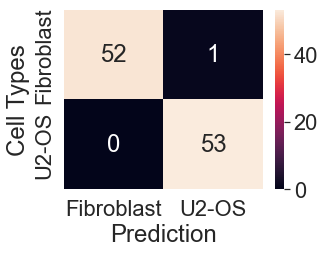

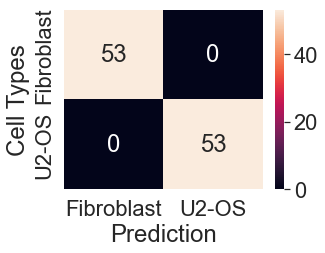

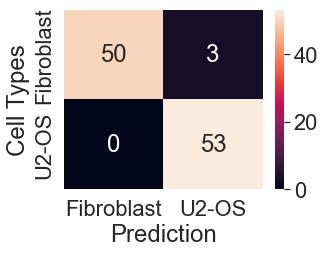

In [342]:
for k in confusions.keys():
    fig,ax = plt.subplots(1,1,figsize=(5,4))
    g = sns.heatmap(confusions[k],annot=True,ax=ax)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Cell Types')
    plt.tight_layout()
    # plt.savefig(r'.\figures\merfish confusion matrix '+ k +'.png')
    plt.show()

In [344]:
confusions.keys()

dict_keys(['count', 'network', 'patch'])

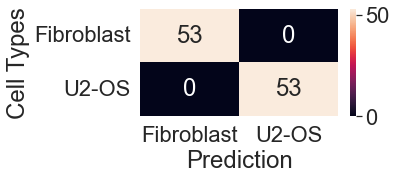

In [348]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
g = sns.heatmap(confusions['network'],annot=True,ax=ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Cell Types')
plt.tight_layout()
plt.savefig(r'.\figures\merfish confusion matrix '+ k +' wide.png')
plt.show()

# seqFISH dataset

In [ ]:
confusions = {}
idx = []
for fn in fn_l:
    if fn.endswith('.pkl'):
        data = pd.read_pickle(os.path.join(dataPath, fn))
        df = pd.DataFrame(data)
        clusters = df.groupby('Cluster')
        l = df['Cluster'].unique()
        replacer = {}
        for item in l:
            group = clusters.get_group(item)
            temp = group['Cell types'].value_counts()
            replacer[item] = temp.idxmax()
        df = df.replace({"Cluster": replacer})
        name = fn.split('_')[0]
        idx.append(name)
        confusion = confusion_matrix(df['Cell types'].tolist(),
                                     df['Cluster'].tolist(),labels=['HBM','HUC','HCH'])
        confusion = pd.DataFrame(confusion,columns=['HBM','HUC','HCH'],index=['HBM','HUC','HCH'])
        confusions[name] = confusion

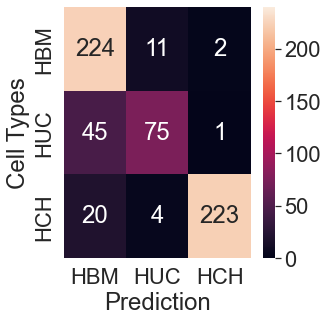

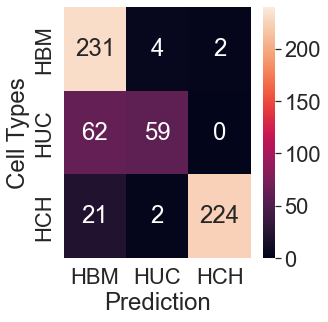

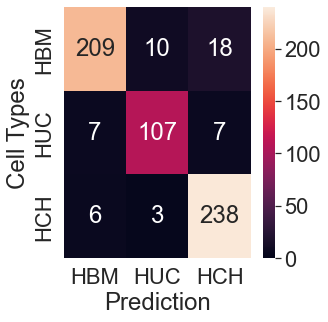

In [329]:
for k in confusions.keys():
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    g=sns.heatmap(confusions[k],vmin=0,vmax=240,annot=True,fmt='g',ax=ax)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Cell Types')
    plt.tight_layout()
    plt.savefig(r'.\figures\seqfish confusion matrix '+ k +'.png')
    plt.show()

In [330]:
confusions.keys()

dict_keys(['correlation clustering v. cell type.pkl', 'expression clustering v. cell type.pkl', 'network variance clustering v. cell type.pkl'])

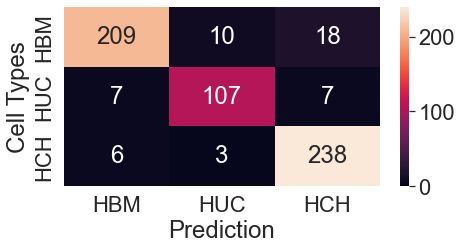

In [338]:
fig,ax = plt.subplots(1,1,figsize=(7,4))
g=sns.heatmap(confusions[k],vmin=0,vmax=240,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Cell Types')
plt.tight_layout()
plt.savefig(r'.\figures\seqfish confusion matrix '+ k +' wide.png')
plt.show()

## high variance genes clustering

In [7]:
df

,Cell types,Cluster
0,Fibroblast,Fibroblast
1,Fibroblast,Fibroblast
2,Fibroblast,Fibroblast
3,Fibroblast,Fibroblast
4,Fibroblast,Fibroblast
...,...,...
101,U2-OS,U2-OS
102,U2-OS,U2-OS
103,U2-OS,U2-OS
104,U2-OS,U2-OS


In [8]:
in_dir = r'Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines\seqfish_results\expression clustering v. cell type.pkl'
data = pd.read_pickle(in_dir)
df = pd.DataFrame(data)
clusters = df.groupby('Cluster')
l = df['Cluster'].unique()
replacer = {}
for item in l:
    group = clusters.get_group(item)
    temp = group['Cell types'].value_counts()
    replacer[item] = temp.idxmax()
df = df.replace({"Cluster": replacer})
# name = fn.split('_')[0]
# idx.append(name)
confusion = confusion_matrix(df['Cell types'].tolist(),
                             df['Cluster'].tolist(),labels=['HBM','HUC','HCH'])
confusion = pd.DataFrame(confusion,columns=['HBM','HUC','HCH'],index=['HBM','HUC','HCH'])
# confusions[name] = confusion

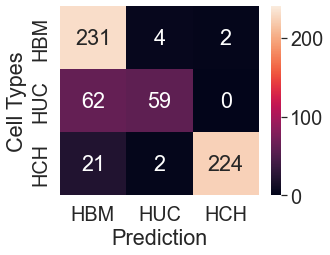

In [12]:
sns.set(font_scale=1.8)
fig,ax = plt.subplots(1,1,figsize=(5,4))
g=sns.heatmap(confusion,vmin=0,vmax=240,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Cell Types')
plt.tight_layout()
plt.savefig(r'Y:\coskun-lab\Zhou\4_HCR\2D_analyses_pipelines\merfish_analysis\figures\seqfish confusion matrix full genes.png')
plt.show()